# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [42]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 358 (delta 59), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (358/358), 42.64 MiB | 18.21 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/machine_learning_1/perceptron_algorithm/machine_learning_1/perceptron_algorithm


In [43]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [44]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

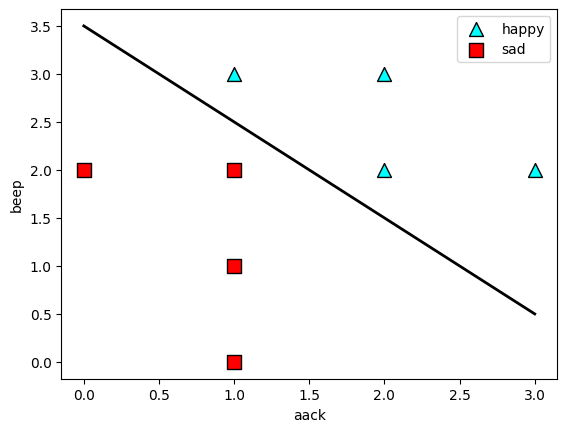

In [45]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [46]:
def step(x):
    ## TODO ##
    # implement step function
    output = 1 if x > 0 else 0
    return output
step(0)

0

In [52]:
def step(x):
    ## TODO ##
    # implement step function
    output = 1 if x > 0 else 0
    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output = weights@features+bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    y_perdict = score(weights, bias, features)
    output = step(y_perdict)
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    score1 = score(weights, bias, features)
    y_perdict = prediction(weights, bias, features)
    output = 0 if y_perdict==label  else abs(score1)
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [53]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    y_p =  prediction(weights, bias, features)
    weights=weights+learning_rate*features*(label-y_p)
    bias=bias+learning_rate*(label-y_p)
    return weights, bias

### Running the perceptron algorithm

In [67]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    for i in range(epochs):
        x = random.randint(0,7)
        label =labels[x]
        feature = features[x]
        weights, bias = perceptron_trick(weights, bias, feature, label, learning_rate = 0.01)
        errors.append(mean_perceptron_error(weights, bias, features, labels))
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

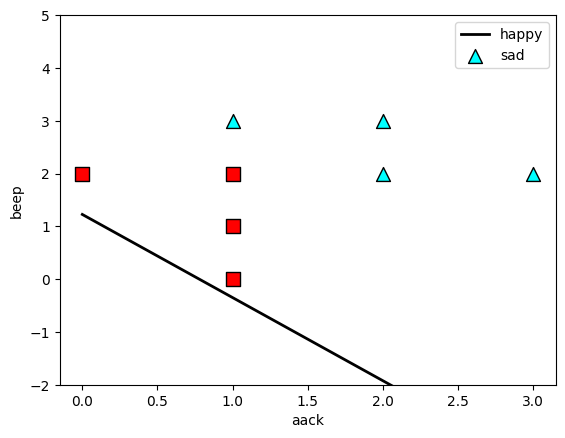

(array([0.63, 0.4 ]), -0.49000000000000027)

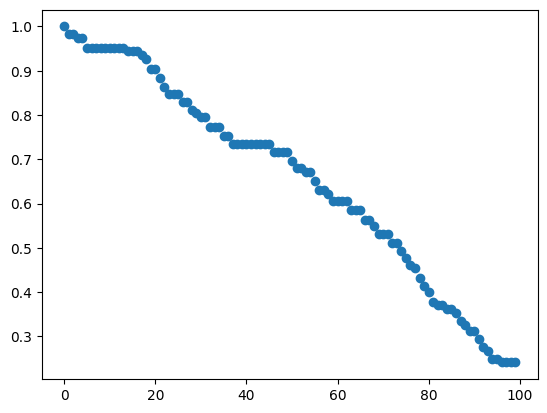

In [76]:
perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 100)

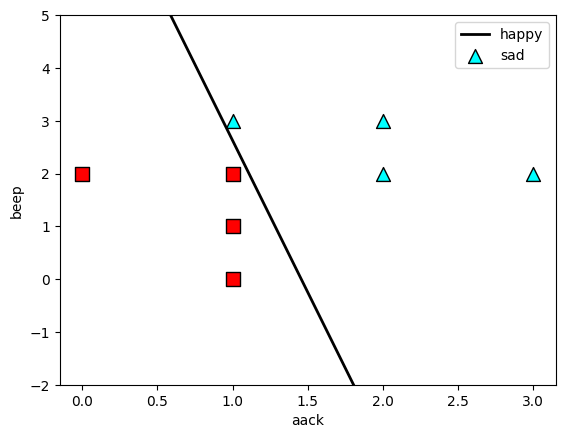

(array([0.46, 0.08]), -0.6700000000000004)

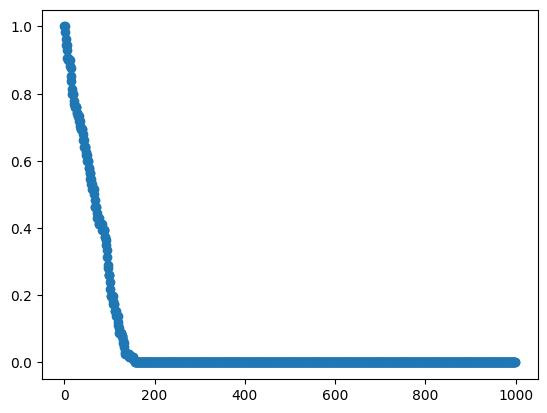

In [77]:
perceptron_algorithm(features, labels, learning_rate = 0.1, epochs = 1000)

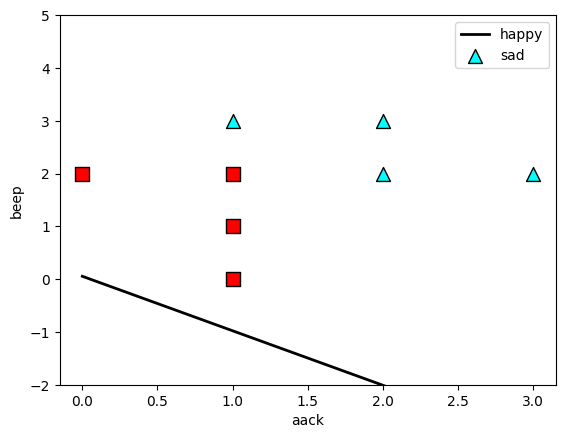

(array([0.96, 0.93]), -0.05)

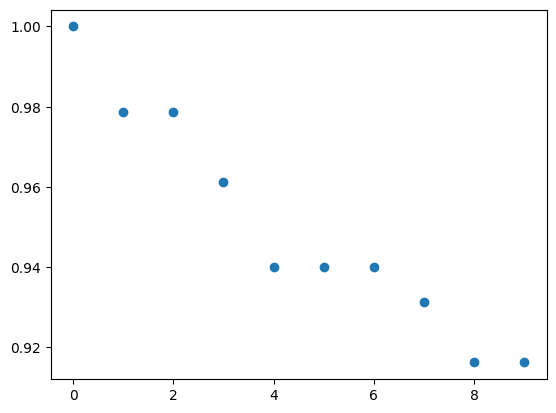

In [78]:
perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 10)

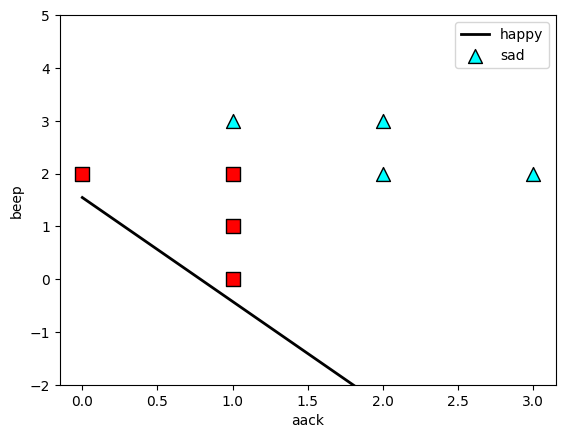

(array([0.65, 0.33]), -0.5100000000000002)

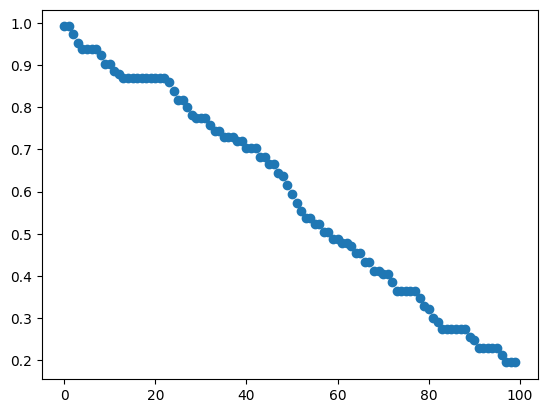

In [79]:
perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 100)

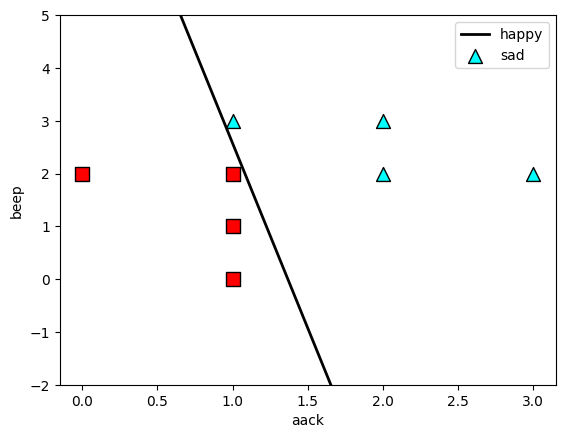

(array([0.49, 0.07]), -0.6700000000000004)

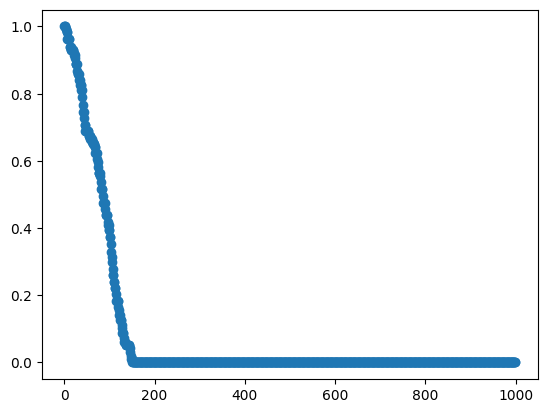

In [82]:
perceptron_algorithm(features, labels, learning_rate = .010, epochs = 1000)

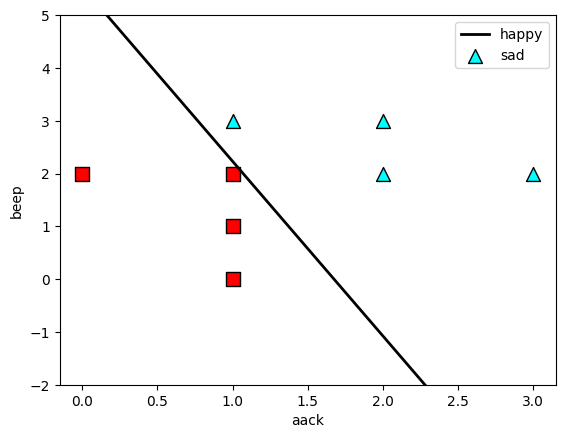

(array([0.43, 0.13]), -0.7200000000000004)

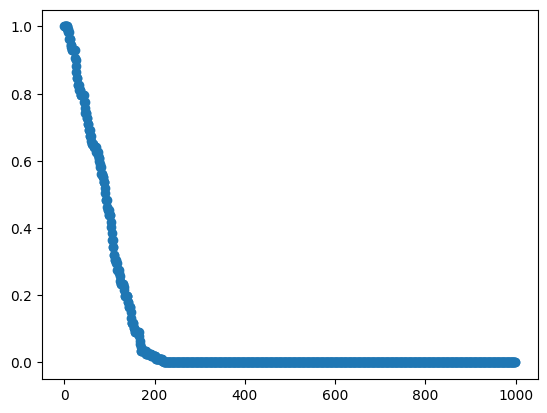

In [75]:
perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 1000)

### The perceptron algorithm using SKlearn

In [72]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# choose loss to be "perceptron" and tol = None
clf=SGDClassifier(tol = None,alpha=.001)
clf.fit(features, labels)

SGDClassifier(alpha=0.001, tol=None)

In [73]:
clf.score(features, labels)

1.0

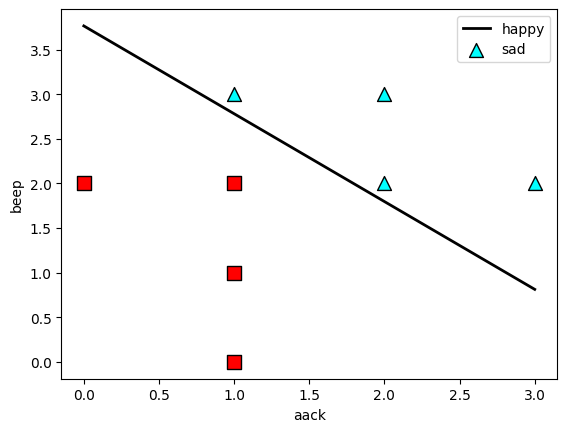

In [74]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()